# Data generation and visualization

## Exercise 1
- Generate a dataset drawn from two independent Gaussians, each of which represents a class. You are free to select the number of desired datapoints, the mean and variance of the two distributions.
- Flip randomly a percentage of the labels to introduce some noise and plot the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from unsupervised_learning import mixGauss, label_noise, swiss_roll

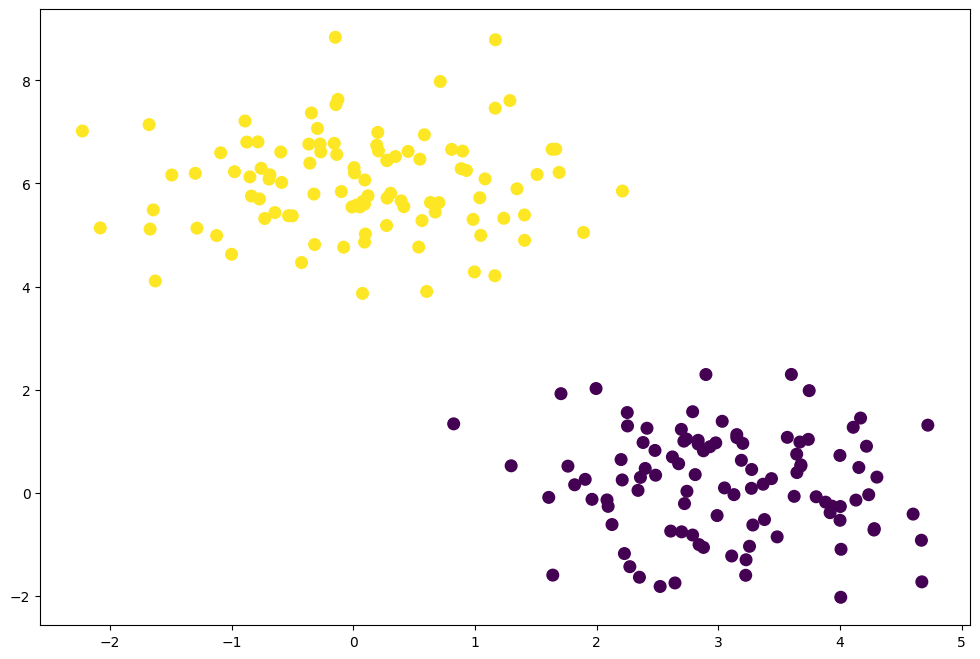

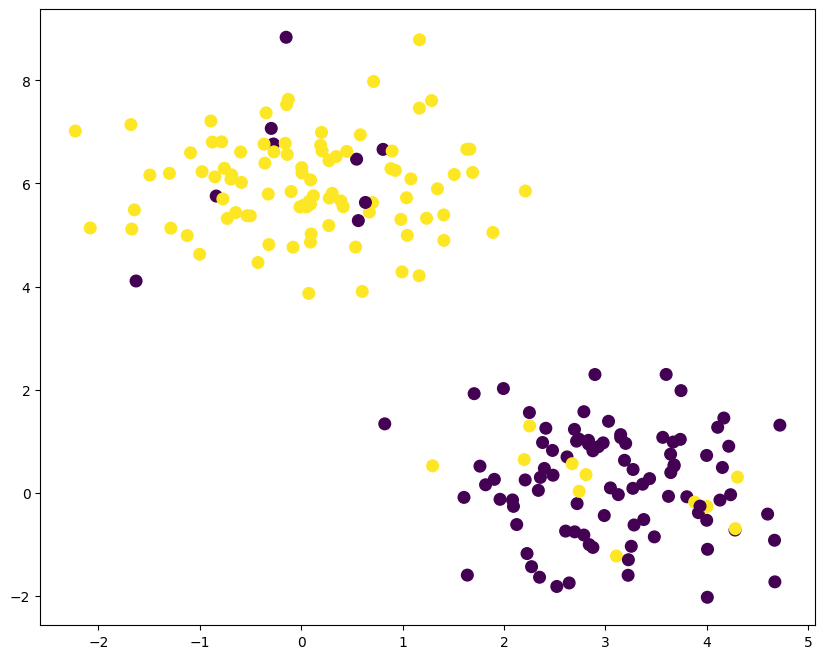

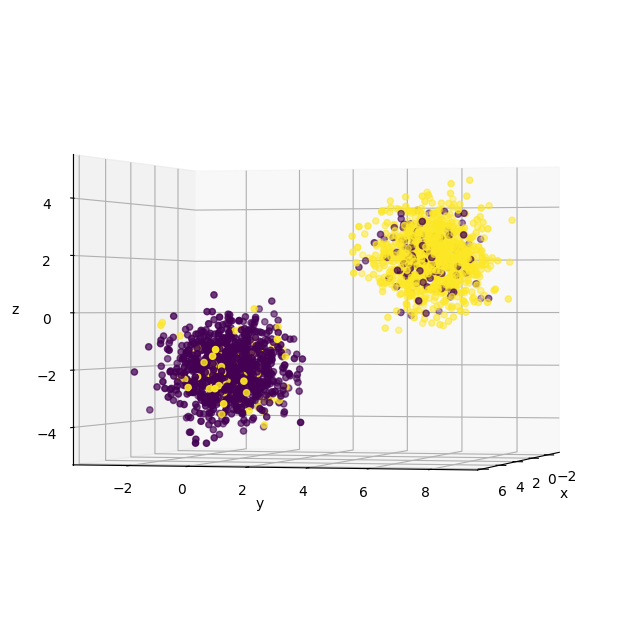

In [2]:
means = [[3, 0], [0, 6]]
sigmas = [0.9, 0.9]
n = 100
x, labels = mixGauss(means, sigmas, n)

fig = plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], s=70, c=labels)
plt.show()

noisylabels = label_noise(0.1, labels)

fig = plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], s=70, c=noisylabels)
plt.show()

means = [[3, 0, -2], [0, 6, 2]]
sigmas = [0.9, 0.9]
n = 1000
x, labels = mixGauss(means, sigmas, n)
noisylabels = label_noise(0.1, labels)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=noisylabels)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 15)
plt.show()

## Exercise 2
Create a dataset of n = 1000 points laying on a swiss roll and plot them both in 2d and 3d.


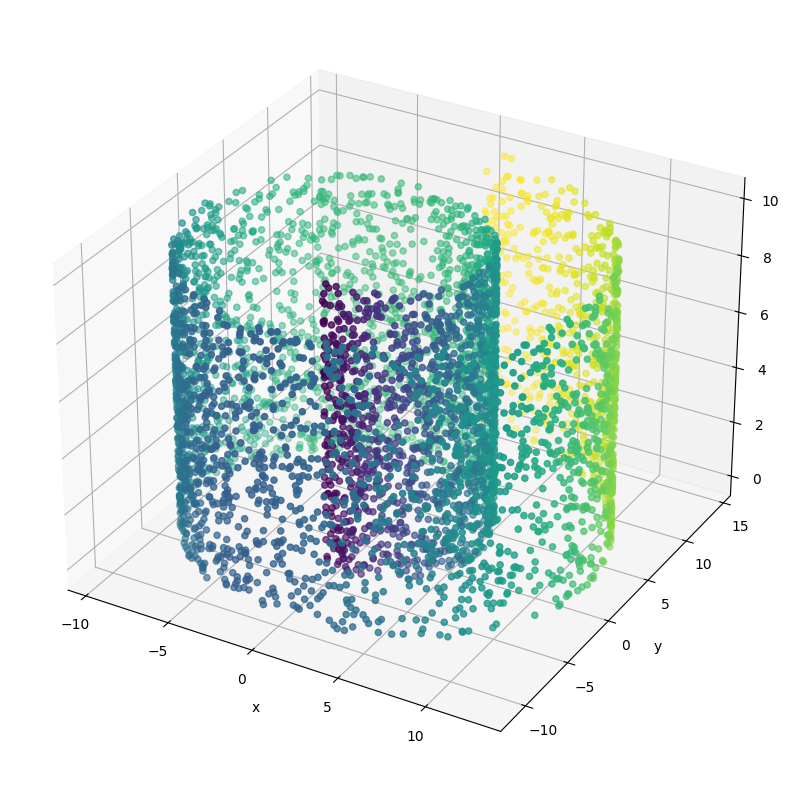

In [3]:
x = swiss_roll(5000)
clr = np.sqrt(np.square(x[:, 0])+np.square(x[:, 1]+5))

plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=clr)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

plt.show()

## Exercise 3
Find the equation describing the Klein bottle problem. Generate a dataset and plot it as in Exercise 2.

In [4]:
def klein_bottle(n):
    """
    Paramterers:
    n: int
        Number of points to generate
    """
    data = np.zeros((n,3))
    u = np.random.uniform(0, np.pi, n)
    v = np.random.uniform(0, 2 * np.pi, n)

    data[:,0] = -2/15*np.cos(u)*(3*np.cos(v)-30*np.sin(u)+90 * np.cos(u)**4 * np.sin(u) -
                     60*np.cos(u) ** 6*np.sin(u)+5 * np.cos(u)*np.cos(v)*np.sin(u))
    data[:,1] = -1/15*np.sin(u)*(3*np.cos(v)-3*np.cos(u) ** 2*np.cos(v)-48*np.cos(u) ** 4 * np.cos(v)+48 * np.cos(u) ** 6*np.cos(v)-60*np.sin(u)+5 * np.cos(u)
                     * np.cos(v)*np.sin(u)-5*np.cos(u) ** 3*np.cos(v) * np.sin(u)-80*np.cos(u) ** 5*np.cos(v)*np.sin(u)+80 * np.cos(u) ** 7*np.cos(v)*np.sin(u))
    data[:,2] = 2/15*(3+5*np.cos(u)*np.sin(u))*np.sin(v)
    return data

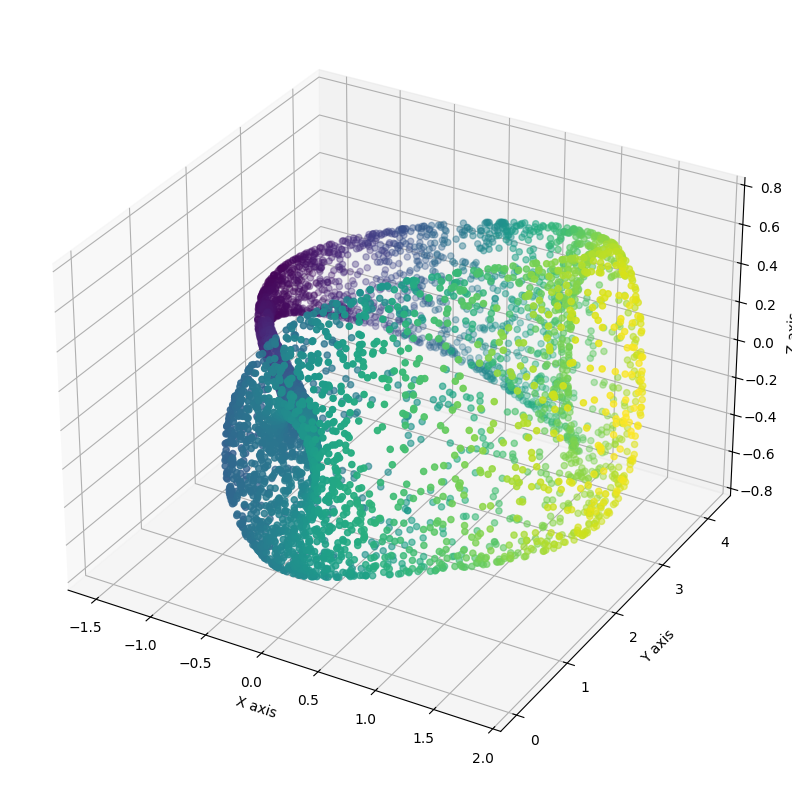

In [5]:
x = klein_bottle(5000)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:,0])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()